# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Kilometers_per_liter` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

Importing the libraries such as pandas, numpy, matplotlib, seaborn, sklearn

In [2]:
# Import the required package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Reading the file

In [3]:
# Read the given CSV file, and view some sample records

vdata = pd.read_csv("Vehicle data.csv")

Understanding the Data

In [4]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
vdata.head(1)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587


In [6]:
vdata.shape

(398, 9)

Cleaning the data

In [7]:
vdata["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
vdata = vdata[vdata['horsepower'] != "?" ]

In [9]:
vdata = vdata.reset_index(drop = True)

In [10]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    object 
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


In [11]:
vdata["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
vdata.shape

(392, 9)

In [13]:
vdata.head(1)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587


In [14]:
vdata["horsepower"] = vdata["horsepower"].astype(int)

In [15]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    int32  
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.2+ KB


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `kilometers_per_liter`.

Finding the relevant attributes by correlation factor


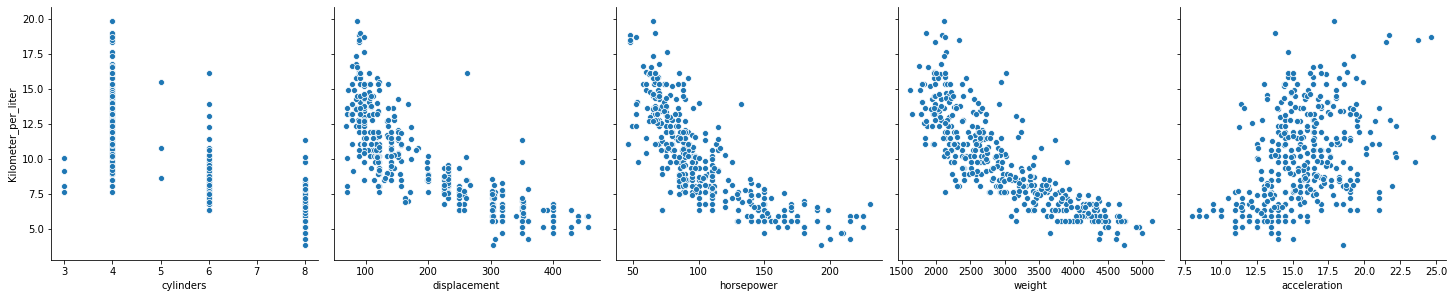

In [16]:
sns.pairplot(vdata, x_vars=['cylinders', 'displacement', 'horsepower','weight','acceleration'], y_vars='Kilometer_per_liter',size=4, aspect=1, kind='scatter')
plt.show()

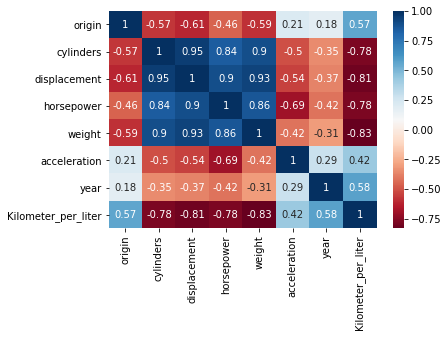

In [17]:
sns.heatmap(vdata.corr(),cmap="RdBu",annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable displacement, horsepower and weight seems to be most inversely correlated with Kilometer_per_liter. So let's go ahead and perform simple linear regression using displacement, horsepower and weight as our feature variable.

In [18]:
vdata.head(1)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587


creating x and y 

In [19]:
x = vdata["weight"]
y = vdata["Kilometer_per_liter"]

Splitting the data using train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 000)

In [21]:
x_train.head()

391    2720
158    3907
141    2300
342    2065
66     4633
Name: weight, dtype: int64

In [22]:
x_train.shape

(274,)

In [23]:
y_train.shape

(274,)

Calling the model


In [24]:
lr = LinearRegression()

adding the constant to get intercept 

In [25]:
import statsmodels.api as sm

In [26]:
x_train_sm = sm.add_constant(x_train)

Fitting the model

In [27]:
lr = sm.OLS(y_train, x_train_sm).fit()

In [28]:
x_train_sm.head()

,const,weight
391,1.0,2720
158,1.0,3907
141,1.0,2300
342,1.0,2065
66,1.0,4633


In [29]:
lr.params

const     19.664615
weight    -0.003277
dtype: float64

In [30]:
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.703
Model:                             OLS   Adj. R-squared:                  0.702
Method:                  Least Squares   F-statistic:                     644.5
Date:                 Sat, 27 Aug 2022   Prob (F-statistic):           1.03e-73
Time:                         22:28:50   Log-Likelihood:                -549.36
No. Observations:                  274   AIC:                             1103.
Df Residuals:                      272   BIC:                             1110.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6646      0.402     48.95

plotting the linear regression


## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

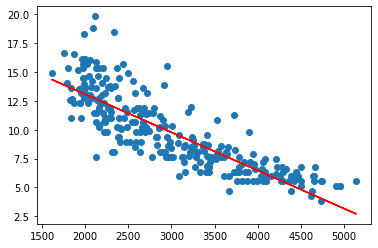

In [31]:
plt.scatter(x_train,y_train)
plt.plot(x_train,19.665903+(-0.0033)*x_train, 'r')
plt.show()

Predictions on the Test Set

In [32]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

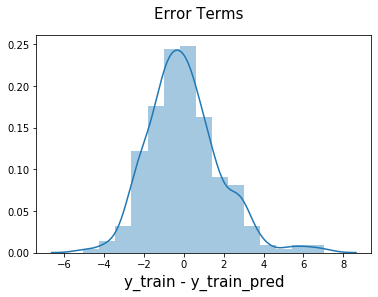

In [33]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

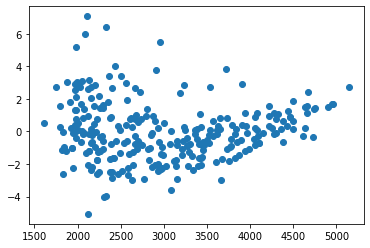

In [34]:
plt.scatter(x_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [35]:
# Add a constant to X_test
X_test_sm = sm.add_constant(x_test)

In [36]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [37]:
y_pred.head()

144    12.701661
280    10.194998
68      5.063711
372    12.701661
328    12.636128
dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Looking at the RMSE

In [39]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.9315711772808866

###### Checking the R-squared on the test set

In [40]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6644440346682534

### Visualizing the fit on the test set

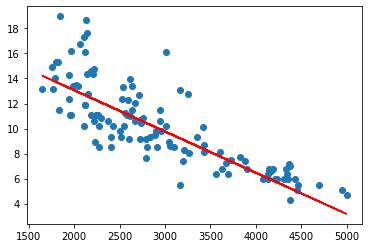

In [41]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 19.665903+(-0.0033)* x_test, 'r')
plt.show()

As you can see, the regression line is a pretty good fit to the data